## Predicting the per capita income based on previous observations

In [1]:
# Importing libraries
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('canada_per_capita_income.csv')

In [3]:
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
data.nunique()

year                       47
per capita income (US$)    47
dtype: int64

In [5]:
data.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [6]:
data.shape

(47, 2)

In [7]:
data.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
90%,2011.400000,37836.100810
95%,2013.700000,41946.265927
99%,2015.540000,42671.310666


In [8]:
data.columns = ['year','per_capita_income']

In [9]:
data.columns

Index(['year', 'per_capita_income'], dtype='object')

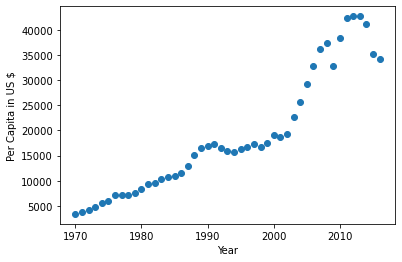

In [10]:
# Plotting the graph to see if there are any outlier or to get an idea of a dataset
plt.xlabel('Year')
plt.ylabel('Per Capita in US $')
plt.scatter(data[['year']], data[['per_capita_income']])

In [11]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['year']],
                                                    data['per_capita_income'],test_size=0.3, random_state=100)

In [12]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = reg.predict(X_test)

In [14]:
y_pred

array([ 4763.77192815, 13894.30090352, 16384.44516953, 35475.55120893,
       32985.40694292, 37965.69547494,  3933.72383948, 23854.87796755,
       22194.78179021, 27175.07032223,  -216.51660386, 34645.50312026,
       26345.02223356, 28835.16649957, 17214.4932582 ])

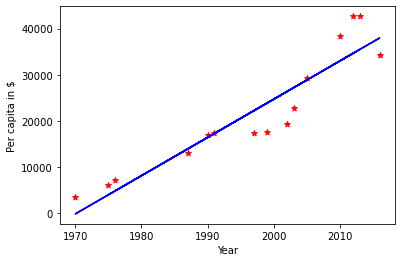

In [15]:
plt.xlabel('Year')
plt.ylabel('Per capita in $')
plt.scatter(X_test,y_test, color='red',marker='*')
plt.plot(X_test,y_pred, color='blue')

In [16]:
# Model Evaluation

In [17]:
reg.score(X_test,y_test)

0.864000936723104

In [18]:
# Pickling
import pickle

In [20]:
with open('model_pkl','wb') as f:
    pickle.dump(reg, f)

In [21]:
with open('model_pkl','rb') as f:
    model = pickle.load(f)

In [22]:
model.score(X_test, y_test)

0.864000936723104

In [25]:
# Using joblib
import joblib

In [26]:
joblib.dump(reg, 'model_joblib')

['model_joblib']

In [28]:
model_jl = joblib.load('model_joblib')

In [29]:
model_jl.score(X_test, y_test)

0.864000936723104